#### Basic Setup

In [1]:
#Python ≥3.5 is required
import sys
assert sys.version_info>=(3,5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in google Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# common import
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Percepton

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)]  ##petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

<ipython-input-2-a0bd70c73a05>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


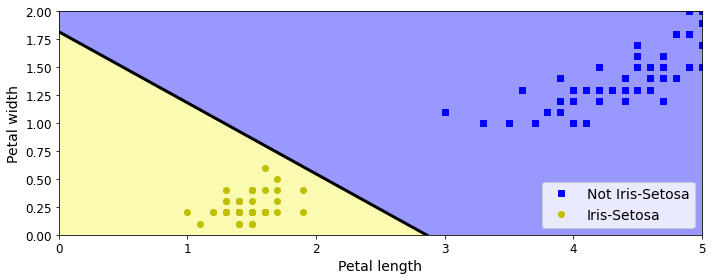

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


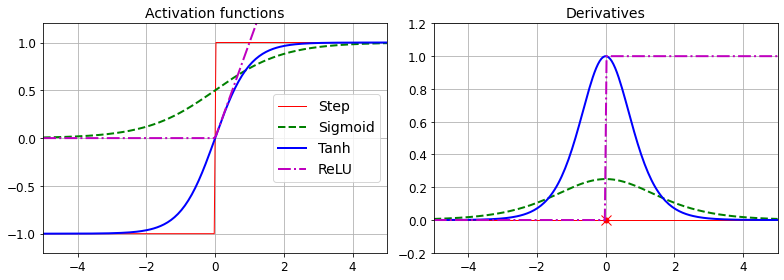

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

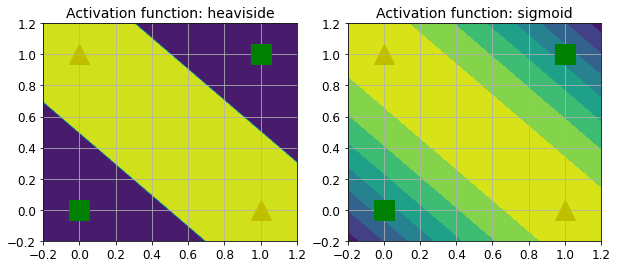

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.5.0'

In [11]:
keras.__version__

'2.5.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [13]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [14]:
X_train_full.dtype

dtype('uint8')

In [15]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

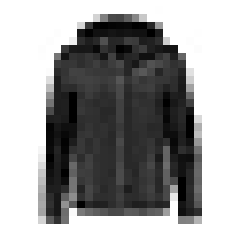

In [16]:
plt.imshow(X_train[0], cmap = 'binary')
plt.axis('off')
plt.show()

In [17]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [19]:
class_names[y_train[0]]

'Coat'

In [20]:
X_valid.shape

(5000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


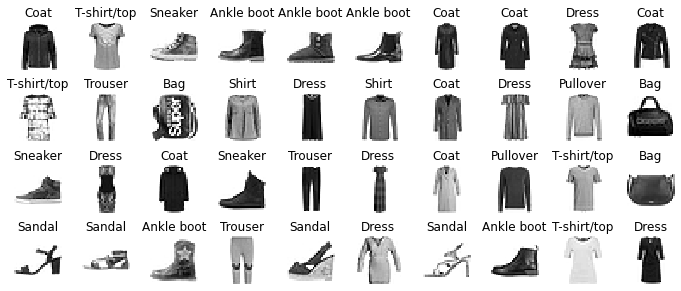

In [22]:
n_rows = 4
n_columns = 10

plt.figure(figsize=(n_columns * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_columns):
        index = n_columns * row + col
        plt.subplot(n_rows, n_columns, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
model.layers

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation= "relu"),
    keras.layers.Dense(100, activation= "relu"),
    keras.layers.Dense(10, activation= "softmax")
])

In [28]:
model.layers

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [31]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [32]:
model.get_layer(hidden1.name) is hidden1

True

In [33]:
weights, biases = hidden1.get_weights()

In [34]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [35]:
weights.shape

(784, 300)

In [36]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
biases.shape

(300,)

In [38]:
model.compile(loss='sparse_categorical_crossentropy',
                optimizer = 'sgd',
                metrics = ['accuracy'])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [39]:
history = model.fit(X_train,y_train, epochs= 30,
                    validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 2s 994us/step - loss: 0.4393 - accuracy: 0.8455 - val_loss: 0.5316 - val_accuracy: 0.7990
Epoch 4/30
1719/1719 [==============================] - 2s 949us/step - loss: 0.4124 - accuracy: 0.8565 - val_loss: 0.3917 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 2s 895us/step - loss: 0.3940 - accuracy: 0.8618 - val_loss: 0.3749 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3753 - accuracy: 0.8674 - val_loss: 0.3705 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3634 - accuracy: 0.8715 - val_loss: 0.3622 - val_acc

In [40]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [41]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


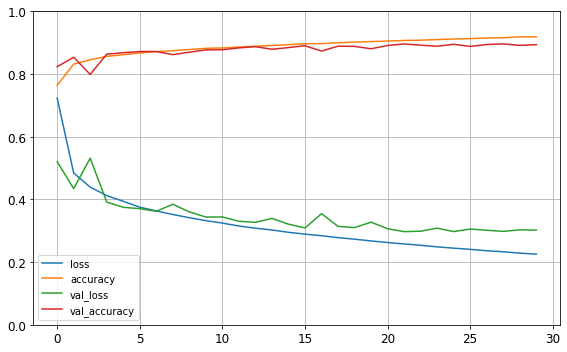

In [43]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
save_fig("keras_learning_curves_plot")
plt.show()

In [44]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 872us/step - loss: 0.3376 - accuracy: 0.8814


[0.33759602904319763, 0.8813999891281128]

In [45]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [46]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [47]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [48]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


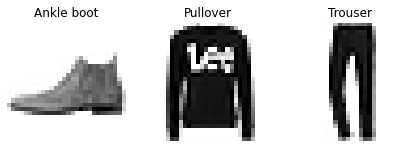

In [49]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [50]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 750us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 752us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 751us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 730us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 753us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 787us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 752us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 755us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 734us/step - loss: 0.4875 

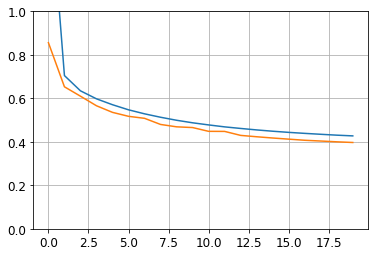

In [53]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [54]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022794 ]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [55]:
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [57]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [58]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 868us/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 799us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 798us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 796us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 816us/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 786us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 828us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 786us/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 799us/step - loss: 0.4659 

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [61]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                validation_data = ((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 845us/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 860us/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 844us/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 851us/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 852us/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 843us/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 873us/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 849us/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 865us/step - loss: 0.4644 

Adding an auxiliary output for regularization:

In [62]:
np.random.seed(42)
tf.random.set_seed(42)

In [63]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = 'main_output')(concat)
aux_output = keras.layers.Dense(1, name = 'aux_output')(hidden2)
model = keras.models.Model(inputs = [input_A, input_B],
                            outputs = [output, aux_output])
                            

In [64]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [65]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
                    validation_data = ([X_valid_A,X_valid_B],[y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 0s 997us/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 993us/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 0s 973us/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - va

In [66]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 671us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


# The subclassing API

In [67]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units = 30, activation = 'relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation='relu')


In [68]:
model.compile(loss='mse', loss_weights=[0.9,0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs= 10,
                    validation_data = ((X_valid_A, X_valid_B), (y_valid, y_valid)))

total_loss, main_loss, aux_loss = model.evaluate((X_test_A,X_test_B),(y_test,y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 0s 945us/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 0s 952us/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 0s 939us/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 0s 965us/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.596

# Saving and Restoring

In [69]:
np.random.seed(42)
tf.random.set_seed(42)

In [70]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape= [8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [71]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 797us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 774us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 755us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 787us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 763us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 763us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 779us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 819us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 522us/step - loss: 0.4382


In [72]:
model.save("my_keras_model.h5")

In [73]:
model = keras.models.load_model("my_keras_model.h5")

In [74]:
model.predict(X_new)

array([[0.5400236],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [75]:
model.save_weights("my_keras_weights.ckpt")

In [76]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [77]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [79]:
model.compile(loss='mse', optimizer = keras.optimizers.SGD(learning_rate = 1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 856us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 787us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 777us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 774us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 763us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 778us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 785us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 774us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 543us/step - loss: 0.4382


In [80]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 782us/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 770us/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 788us/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 796us/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 797us/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 832us/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 779us/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 796us/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 777us/step - los

In [81]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [82]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 0s 944us/step - loss: 0.3302 - val_loss: 0.3559

val/train: 1.08


# TensorBoard

In [83]:
root_logdir = os.path.join(os.curdir, 'my_logs')

In [84]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_07_12-15_13_50'

In [85]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer = keras.optimizers.SGD(learning_rate=1e-3))

In [87]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 920us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 779us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 774us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 775us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 775us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 778us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 819us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 808us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 835us/step - loss: 0.4474 

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [88]:
%load_ext tensorboard

In [89]:
%tensorboard --logdir=./my_logs --port=6006

In [90]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_07_12-15_25_48'

In [93]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [94]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape = [8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [95]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.5530 - val_loss: 302.8466
Epoch 2/30
363/363 [==============================] - 0s 811us/step - loss: 63.6669 - val_loss: 0.9735
Epoch 3/30
363/363 [==============================] - 0s 828us/step - loss: 0.9411 - val_loss: 0.9599
Epoch 4/30
363/363 [==============================] - 0s 865us/step - loss: 0.9197 - val_loss: 0.8464
Epoch 5/30
363/363 [==============================] - 0s 777us/step - loss: 0.9819 - val_loss: 0.9281
Epoch 6/30
363/363 [==============================] - 0s 774us/step - loss: 0.9240 - val_loss: 0.9089
Epoch 7/30
363/363 [==============================] - 0s 723us/step - loss: 0.9179 - val_loss: 0.8815
Epoch 8/30
363/363 [==============================] - 0s 777us/step - loss: 0.8950 - val_loss: 0.9007
Epoch 9/30
363/363 [==============================] - 0s 788us/step - loss: 0.9150 - val_loss: 0.8734
Epoch 10/30
363/363 [==============================] - 0s 817us/step - loss: 0.89

In [96]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [105]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [106]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [107]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [108]:
keras_reg.fit(X_train,y_train,epochs = 100, 
                validation_data = (X_valid,y_valid),
                callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 839us/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 778us/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 785us/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 774us/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 807us/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 777us/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 785us/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 796us/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 777us/step - lo

In [109]:
mse_test = keras_reg.fit(X_test, y_test)

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


162/162 [==============================] - 0s 598us/step - loss: 1.6204


In [110]:
y_pred = keras_reg.predict(X_new)

In [111]:
np.random.seed(42)
tf.random.set_seed(42)

In [113]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden" : [0,1,2,3],
    "n_neurons" : np.arange(1,100),
    "learning_rate" : reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs = 100, 
                validation_data=(X_valid, y_valid),
                callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100


c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 3.5557 - val_loss: 1.8752
Epoch 2/100
242/242 [==============================] - 0s 828us/step - loss: 1.3347 - val_loss: 0.9522
Epoch 3/100
242/242 [==============================] - 0s 830us/step - loss: 0.8591 - val_loss: 0.7820
Epoch 4/100
242/242 [==============================] - 0s 930us/step - loss: 0.7360 - val_loss: 0.7249
Epoch 5/100
242/242 [==============================] - 0s 824us/step - loss: 0.6930 - val_loss: 0.6994
Epoch 6/100
242/242 [==============================] - 0s 813us/step - loss: 0.6668 - val_loss: 0.9118
Epoch 7/100
242/242 [==============================] - 0s 780us/step - loss: 0.6514 - val_loss: 0.8495
Epoch 8/100
242/242 [==============================] - 0s 764us/step - loss: 0.6381 - val_loss: 0.8605
Epoch 9/100
242/242 [==============================] - 0s 811us/step - loss: 0.6276 - val_loss: 0.6524
Epoch 10/100
242/242 [==============================] - 0s 802us/step - loss: 0.6125 - 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 3.5605 - val_loss: 23.0855
Epoch 2/100
242/242 [==============================] - 0s 859us/step - loss: 1.4777 - val_loss: 10.8387
Epoch 3/100
242/242 [==============================] - 0s 796us/step - loss: 1.0149 - val_loss: 4.4392
Epoch 4/100
242/242 [==============================] - 0s 818us/step - loss: 0.8729 - val_loss: 1.5338
Epoch 5/100
242/242 [==============================] - 0s 815us/step - loss: 0.8027 - val_loss: 0.7192
Epoch 6/100
242/242 [==============================] - 0s 797us/step - loss: 0.7542 - val_loss: 1.2046
Epoch 7/100
242/242 [==============================] - 0s 830us/step - loss: 0.7160 - val_loss: 2.4524
Epoch 8/100
242/242 [==============================] - 0s 847us/step - loss: 0.6847 - val_loss: 4.1421
Epoch 9/100
242/242 [==============================] - 0s 891us/step - loss: 0.6588 - val_loss: 5.9820
Epoch 10/100
242/242 [==============================] - 0s 899us/step - loss: 0.6371 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 3.2972 - val_loss: 1.3307
Epoch 2/100
242/242 [==============================] - 0s 882us/step - loss: 0.9648 - val_loss: 0.6934
Epoch 3/100
242/242 [==============================] - 0s 921us/step - loss: 0.6150 - val_loss: 0.5469
Epoch 4/100
242/242 [==============================] - 0s 921us/step - loss: 0.5468 - val_loss: 0.7322
Epoch 5/100
242/242 [==============================] - 0s 845us/step - loss: 0.5372 - val_loss: 0.4963
Epoch 6/100
242/242 [==============================] - 0s 810us/step - loss: 0.5330 - val_loss: 0.5539
Epoch 7/100
242/242 [==============================] - 0s 818us/step - loss: 0.5320 - val_loss: 0.5729
Epoch 8/100
242/242 [==============================] - 0s 813us/step - loss: 0.5297 - val_loss: 0.7873
Epoch 9/100
242/242 [==============================] - 0s 801us/step - loss: 0.5337 - val_loss: 0.5968
Epoch 10/100
242/242 [==============================] - 0s 814us/step - loss: 0.5314 - 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 1.4256 - val_loss: 66.5657
Epoch 2/100
242/242 [==============================] - 0s 809us/step - loss: 0.9941 - val_loss: 137.1490
Epoch 3/100
242/242 [==============================] - 0s 814us/step - loss: 2.2587 - val_loss: 716.1611
Epoch 4/100
242/242 [==============================] - 0s 849us/step - loss: 4.3545 - val_loss: 2297.8621
Epoch 5/100
242/242 [==============================] - 0s 807us/step - loss: 17.0750 - val_loss: 9988.3398
Epoch 6/100
242/242 [==============================] - 0s 811us/step - loss: 198.7058 - val_loss: 39231.9766
Epoch 7/100
242/242 [==============================] - 0s 814us/step - loss: 424.9947 - val_loss: 155196.9219
Epoch 8/100
242/242 [==============================] - 0s 818us/step - loss: 2992.7771 - val_loss: 612492.9375
Epoch 9/100
242/242 [==============================] - 0s 813us/step - loss: 7662.3364 - val_loss: 2435757.2500
Epoch 10/100
242/242 [=======================

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 1.1573 - val_loss: 23.1193
Epoch 2/100
242/242 [==============================] - 0s 803us/step - loss: 0.5349 - val_loss: 22.1675
Epoch 3/100
242/242 [==============================] - 0s 813us/step - loss: 0.5192 - val_loss: 22.3752
Epoch 4/100
242/242 [==============================] - 0s 806us/step - loss: 0.5148 - val_loss: 21.3891
Epoch 5/100
242/242 [==============================] - 0s 814us/step - loss: 0.5108 - val_loss: 20.8855
Epoch 6/100
242/242 [==============================] - 0s 797us/step - loss: 0.5082 - val_loss: 20.6379
Epoch 7/100
242/242 [==============================] - 0s 801us/step - loss: 0.5070 - val_loss: 20.0736
Epoch 8/100
242/242 [==============================] - 0s 814us/step - loss: 0.5050 - val_loss: 20.7178
Epoch 9/100
242/242 [==============================] - 0s 847us/step - loss: 0.5029 - val_loss: 20.0844
Epoch 10/100
242/242 [==============================] - 0s 802us/step - loss: 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 1.4616 - val_loss: 0.5742
Epoch 2/100
242/242 [==============================] - 0s 814us/step - loss: 0.6113 - val_loss: 6.7367
Epoch 3/100
242/242 [==============================] - 0s 813us/step - loss: 0.5784 - val_loss: 6.5227
Epoch 4/100
242/242 [==============================] - 0s 801us/step - loss: 0.5820 - val_loss: 19.7082
Epoch 5/100
242/242 [==============================] - 0s 814us/step - loss: 0.6738 - val_loss: 205.7215
Epoch 6/100
242/242 [==============================] - 0s 813us/step - loss: 1.6846 - val_loss: 282.6049
Epoch 7/100
242/242 [==============================] - 0s 917us/step - loss: 2.5718 - val_loss: 656.3256
Epoch 8/100
242/242 [==============================] - 0s 793us/step - loss: 12.3829 - val_loss: 1380.0128
Epoch 9/100
242/242 [==============================] - 0s 804us/step - loss: 14.8443 - val_loss: 2817.4573
Epoch 10/100
242/242 [==============================] - 0s 814us/step - 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 2.5089 - val_loss: 2.6033
Epoch 2/100
242/242 [==============================] - 0s 979us/step - loss: 1.0793 - val_loss: 1.0424
Epoch 3/100
242/242 [==============================] - 0s 963us/step - loss: 0.8038 - val_loss: 0.7507
Epoch 4/100
242/242 [==============================] - 0s 928us/step - loss: 0.7203 - val_loss: 0.6758
Epoch 5/100
242/242 [==============================] - 0s 912us/step - loss: 0.6785 - val_loss: 0.6484
Epoch 6/100
242/242 [==============================] - 0s 947us/step - loss: 0.6498 - val_loss: 0.6241
Epoch 7/100
242/242 [==============================] - 0s 963us/step - loss: 0.6261 - val_loss: 0.6073
Epoch 8/100
242/242 [==============================] - 0s 930us/step - loss: 0.6055 - val_loss: 0.5826
Epoch 9/100
242/242 [==============================] - 0s 941us/step - loss: 0.5870 - val_loss: 0.5597
Epoch 10/100
242/242 [==============================] - 0s 931us/step - loss: 0.5700 - 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 2.7762 - val_loss: 17.5435
Epoch 2/100
242/242 [==============================] - 0s 914us/step - loss: 1.1017 - val_loss: 15.4502
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8039 - val_loss: 11.1084
Epoch 4/100
242/242 [==============================] - 0s 946us/step - loss: 0.7051 - val_loss: 8.0885
Epoch 5/100
242/242 [==============================] - 0s 930us/step - loss: 0.6575 - val_loss: 6.1076
Epoch 6/100
242/242 [==============================] - 0s 934us/step - loss: 0.6260 - val_loss: 4.7302
Epoch 7/100
242/242 [==============================] - 0s 963us/step - loss: 0.6007 - val_loss: 3.6783
Epoch 8/100
242/242 [==============================] - 0s 962us/step - loss: 0.5790 - val_loss: 2.8274
Epoch 9/100
242/242 [==============================] - 0s 965us/step - loss: 0.5600 - val_loss: 2.2526
Epoch 10/100
242/242 [==============================] - 0s 918us/step - loss: 0.5433 -

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 2.8501 - val_loss: 2.0961
Epoch 2/100
242/242 [==============================] - 0s 944us/step - loss: 1.1187 - val_loss: 1.2079
Epoch 3/100
242/242 [==============================] - 0s 942us/step - loss: 0.8431 - val_loss: 0.8075
Epoch 4/100
242/242 [==============================] - 0s 918us/step - loss: 0.7630 - val_loss: 0.7207
Epoch 5/100
242/242 [==============================] - 0s 930us/step - loss: 0.7220 - val_loss: 0.6952
Epoch 6/100
242/242 [==============================] - 0s 930us/step - loss: 0.6925 - val_loss: 0.6614
Epoch 7/100
242/242 [==============================] - 0s 995us/step - loss: 0.6677 - val_loss: 0.6378
Epoch 8/100
242/242 [==============================] - 0s 980us/step - loss: 0.6461 - val_loss: 0.6132
Epoch 9/100
242/242 [==============================] - 0s 967us/step - loss: 0.6268 - val_loss: 0.6043
Epoch 10/100
242/242 [==============================] - 0s 943us/step - loss: 0.6081 - 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 2.4720 - val_loss: 7.9722
Epoch 2/100
242/242 [==============================] - 0s 919us/step - loss: 1.1323 - val_loss: 5.6563
Epoch 3/100
242/242 [==============================] - 0s 896us/step - loss: 0.8832 - val_loss: 4.1443
Epoch 4/100
242/242 [==============================] - 0s 919us/step - loss: 0.8066 - val_loss: 3.1169
Epoch 5/100
242/242 [==============================] - 0s 913us/step - loss: 0.7657 - val_loss: 2.6199
Epoch 6/100
242/242 [==============================] - 0s 901us/step - loss: 0.7374 - val_loss: 2.2830
Epoch 7/100
242/242 [==============================] - 0s 927us/step - loss: 0.7171 - val_loss: 1.9726
Epoch 8/100
242/242 [==============================] - 0s 921us/step - loss: 0.6983 - val_loss: 1.7536
Epoch 9/100
242/242 [==============================] - 0s 930us/step - loss: 0.6816 - val_loss: 1.5653
Epoch 10/100
242/242 [==============================] - 0s 934us/step - los

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 3.7641 - val_loss: 28.0492
Epoch 2/100
242/242 [==============================] - 0s 882us/step - loss: 2.0504 - val_loss: 43.0472
Epoch 3/100
242/242 [==============================] - 0s 910us/step - loss: 1.6124 - val_loss: 37.0128
Epoch 4/100
242/242 [==============================] - 0s 913us/step - loss: 1.3603 - val_loss: 28.7538
Epoch 5/100
242/242 [==============================] - 0s 920us/step - loss: 1.1689 - val_loss: 20.6120
Epoch 6/100
242/242 [==============================] - 0s 913us/step - loss: 1.0259 - val_loss: 14.6244
Epoch 7/100
242/242 [==============================] - 0s 913us/step - loss: 0.9261 - val_loss: 10.5960
Epoch 8/100
242/242 [==============================] - 0s 946us/step - loss: 0.8594 - val_loss: 7.2861
Epoch 9/100
242/242 [==============================] - 0s 917us/step - loss: 0.8137 - val_loss: 5.1836
Epoch 10/100
242/242 [==============================] - 0s 929us/step - loss: 0.

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 2.9218 - val_loss: 4.3285
Epoch 2/100
242/242 [==============================] - 0s 929us/step - loss: 1.2869 - val_loss: 2.8653
Epoch 3/100
242/242 [==============================] - 0s 920us/step - loss: 0.9733 - val_loss: 1.8260
Epoch 4/100
242/242 [==============================] - 0s 913us/step - loss: 0.8526 - val_loss: 1.2974
Epoch 5/100
242/242 [==============================] - 0s 899us/step - loss: 0.7870 - val_loss: 0.9606
Epoch 6/100
242/242 [==============================] - 0s 939us/step - loss: 0.7448 - val_loss: 0.7924
Epoch 7/100
242/242 [==============================] - 0s 930us/step - loss: 0.7141 - val_loss: 0.7158
Epoch 8/100
242/242 [==============================] - 0s 924us/step - loss: 0.6902 - val_loss: 0.6616
Epoch 9/100
242/242 [==============================] - 0s 942us/step - loss: 0.6699 - val_loss: 0.6363
Epoch 10/100
242/242 [==============================] - 0s 930us/step - loss: 0.6525 - 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 2.1013 - val_loss: 5.2312
Epoch 2/100
242/242 [==============================] - 0s 811us/step - loss: 0.8603 - val_loss: 26.5013
Epoch 3/100
242/242 [==============================] - 0s 813us/step - loss: 0.7494 - val_loss: 40.6122
Epoch 4/100
242/242 [==============================] - 0s 818us/step - loss: 1.0991 - val_loss: 135.6917
Epoch 5/100
242/242 [==============================] - 0s 916us/step - loss: 1.3388 - val_loss: 237.1147
Epoch 6/100
242/242 [==============================] - 0s 814us/step - loss: 4.6734 - val_loss: 506.5565
Epoch 7/100
242/242 [==============================] - 0s 856us/step - loss: 5.0735 - val_loss: 1165.5577
Epoch 8/100
242/242 [==============================] - 0s 818us/step - loss: 19.0953 - val_loss: 2646.9749
Epoch 9/100
242/242 [==============================] - 0s 822us/step - loss: 28.1002 - val_loss: 5780.9756
Epoch 10/100
242/242 [==============================] - 0s 813us/ste

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 1.4769 - val_loss: 14.0701
Epoch 2/100
242/242 [==============================] - 0s 843us/step - loss: 0.5769 - val_loss: 16.8410
Epoch 3/100
242/242 [==============================] - 0s 815us/step - loss: 0.5493 - val_loss: 19.0635
Epoch 4/100
242/242 [==============================] - 0s 830us/step - loss: 0.5365 - val_loss: 19.7342
Epoch 5/100
242/242 [==============================] - 0s 801us/step - loss: 0.5272 - val_loss: 20.0593
Epoch 6/100
242/242 [==============================] - 0s 813us/step - loss: 0.5202 - val_loss: 20.2376
Epoch 7/100
242/242 [==============================] - 0s 813us/step - loss: 0.5153 - val_loss: 20.0296
Epoch 8/100
242/242 [==============================] - 0s 814us/step - loss: 0.5113 - val_loss: 20.3793
Epoch 9/100
242/242 [==============================] - 0s 847us/step - loss: 0.5078 - val_loss: 20.1103
Epoch 10/100
242/242 [==============================] - 0s 818us/step - loss: 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 2.0333 - val_loss: 13.7380
Epoch 2/100
242/242 [==============================] - 0s 831us/step - loss: 0.6240 - val_loss: 10.0594
Epoch 3/100
242/242 [==============================] - 0s 809us/step - loss: 0.7131 - val_loss: 41.2693
Epoch 4/100
242/242 [==============================] - 0s 796us/step - loss: 1.1121 - val_loss: 74.9048
Epoch 5/100
242/242 [==============================] - 0s 866us/step - loss: 0.9784 - val_loss: 205.5686
Epoch 6/100
242/242 [==============================] - 0s 819us/step - loss: 1.9726 - val_loss: 246.7374
Epoch 7/100
242/242 [==============================] - 0s 818us/step - loss: 2.5115 - val_loss: 388.8352
Epoch 8/100
242/242 [==============================] - 0s 815us/step - loss: 5.9673 - val_loss: 620.5344
Epoch 9/100
242/242 [==============================] - 0s 813us/step - loss: 6.9990 - val_loss: 919.7242
Epoch 10/100
242/242 [==============================] - 0s 814us/step - l

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 1.2457 - val_loss: 22.8634
Epoch 2/100
242/242 [==============================] - 0s 911us/step - loss: 1.1255 - val_loss: 36.5661
Epoch 3/100
242/242 [==============================] - 0s 897us/step - loss: 0.9314 - val_loss: 304.7440
Epoch 4/100
242/242 [==============================] - 0s 851us/step - loss: 0.8113 - val_loss: 71.4702
Epoch 5/100
242/242 [==============================] - 0s 849us/step - loss: 0.8365 - val_loss: 312.6016
Epoch 6/100
242/242 [==============================] - 0s 855us/step - loss: 2.8876 - val_loss: 0.4035
Epoch 7/100
242/242 [==============================] - 0s 835us/step - loss: 0.4331 - val_loss: 0.3815
Epoch 8/100
242/242 [==============================] - 0s 880us/step - loss: 0.3841 - val_loss: 0.3614
Epoch 9/100
242/242 [==============================] - 0s 851us/step - loss: 0.3771 - val_loss: 0.3613
Epoch 10/100
242/242 [==============================] - 0s 847us/step - loss: 0.

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 0.8950 - val_loss: 3.0949
Epoch 2/100
242/242 [==============================] - 0s 867us/step - loss: 0.5223 - val_loss: 0.4712
Epoch 3/100
242/242 [==============================] - 0s 892us/step - loss: 0.4610 - val_loss: 0.4231
Epoch 4/100
242/242 [==============================] - 0s 836us/step - loss: 0.4356 - val_loss: 0.4021
Epoch 5/100
242/242 [==============================] - 0s 865us/step - loss: 0.4204 - val_loss: 0.4323
Epoch 6/100
242/242 [==============================] - 0s 849us/step - loss: 0.4116 - val_loss: 0.6513
Epoch 7/100
242/242 [==============================] - 0s 884us/step - loss: 0.4057 - val_loss: 0.8508
Epoch 8/100
242/242 [==============================] - 0s 979us/step - loss: 0.4000 - val_loss: 1.0201
Epoch 9/100
242/242 [==============================] - 0s 847us/step - loss: 0.3954 - val_loss: 1.1757
Epoch 10/100
242/242 [==============================] - 0s 869us/step - loss: 0.3924 - 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 0.9047 - val_loss: 1.2874
Epoch 2/100
242/242 [==============================] - 0s 843us/step - loss: 0.4870 - val_loss: 0.7809
Epoch 3/100
242/242 [==============================] - 0s 852us/step - loss: 0.4394 - val_loss: 1.8555
Epoch 4/100
242/242 [==============================] - 0s 846us/step - loss: 0.5436 - val_loss: 18.7096
Epoch 5/100
242/242 [==============================] - 0s 852us/step - loss: 0.5247 - val_loss: 78.6914
Epoch 6/100
242/242 [==============================] - 0s 880us/step - loss: 0.8047 - val_loss: 0.4362
Epoch 7/100
242/242 [==============================] - 0s 868us/step - loss: 0.4359 - val_loss: 0.3913
Epoch 8/100
242/242 [==============================] - 0s 847us/step - loss: 0.4187 - val_loss: 0.4217
Epoch 9/100
242/242 [==============================] - 0s 848us/step - loss: 0.4075 - val_loss: 0.4237
Epoch 10/100
242/242 [==============================] - 0s 834us/step - loss: 0.4053 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 4.0446 - val_loss: 7.0502
Epoch 2/100
242/242 [==============================] - 0s 917us/step - loss: 2.3108 - val_loss: 7.2037
Epoch 3/100
242/242 [==============================] - 0s 934us/step - loss: 1.6259 - val_loss: 5.5884
Epoch 4/100
242/242 [==============================] - 0s 946us/step - loss: 1.3383 - val_loss: 3.7640
Epoch 5/100
242/242 [==============================] - 0s 930us/step - loss: 1.1769 - val_loss: 2.5552
Epoch 6/100
242/242 [==============================] - 0s 930us/step - loss: 1.0669 - val_loss: 2.0914
Epoch 7/100
242/242 [==============================] - 0s 918us/step - loss: 0.9873 - val_loss: 1.6989
Epoch 8/100
242/242 [==============================] - 0s 913us/step - loss: 0.9225 - val_loss: 1.4173
Epoch 9/100
242/242 [==============================] - 0s 898us/step - loss: 0.8695 - val_loss: 1.2066
Epoch 10/100
242/242 [==============================] - 0s 906us/step - loss: 0.8251 - 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 5.0701 - val_loss: 2.9725
Epoch 2/100
242/242 [==============================] - 0s 927us/step - loss: 2.1451 - val_loss: 5.9015
Epoch 3/100
242/242 [==============================] - 0s 918us/step - loss: 1.2758 - val_loss: 10.8119
Epoch 4/100
242/242 [==============================] - 0s 930us/step - loss: 1.0903 - val_loss: 11.3108
Epoch 5/100
242/242 [==============================] - 0s 930us/step - loss: 1.0053 - val_loss: 9.9424
Epoch 6/100
242/242 [==============================] - 0s 964us/step - loss: 0.9444 - val_loss: 8.2069
Epoch 7/100
242/242 [==============================] - 0s 945us/step - loss: 0.8977 - val_loss: 6.6004
Epoch 8/100
242/242 [==============================] - 0s 912us/step - loss: 0.8609 - val_loss: 4.8507
Epoch 9/100
242/242 [==============================] - 0s 913us/step - loss: 0.8311 - val_loss: 3.5263
Epoch 10/100
242/242 [==============================] - 0s 915us/step - loss: 0.8061 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 3ms/step - loss: 4.4059 - val_loss: 3.5308
Epoch 2/100
242/242 [==============================] - 0s 930us/step - loss: 2.5613 - val_loss: 3.0045
Epoch 3/100
242/242 [==============================] - 0s 903us/step - loss: 1.4038 - val_loss: 2.5464
Epoch 4/100
242/242 [==============================] - 0s 913us/step - loss: 0.9815 - val_loss: 1.8717
Epoch 5/100
242/242 [==============================] - 0s 930us/step - loss: 0.8396 - val_loss: 1.3067
Epoch 6/100
242/242 [==============================] - 0s 930us/step - loss: 0.7692 - val_loss: 0.9966
Epoch 7/100
242/242 [==============================] - 0s 930us/step - loss: 0.7270 - val_loss: 0.8331
Epoch 8/100
242/242 [==============================] - 0s 934us/step - loss: 0.6993 - val_loss: 0.7309
Epoch 9/100
242/242 [==============================] - 0s 880us/step - loss: 0.6799 - val_loss: 0.6922
Epoch 10/100
242/242 [==============================] - 0s 930us/step - loss: 0.6652 - 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 1.3002 - val_loss: 38.2652
Epoch 2/100
242/242 [==============================] - 0s 831us/step - loss: 0.9964 - val_loss: 0.6706
Epoch 3/100
242/242 [==============================] - 0s 850us/step - loss: 0.5490 - val_loss: 0.5520
Epoch 4/100
242/242 [==============================] - 0s 851us/step - loss: 0.4986 - val_loss: 0.5090
Epoch 5/100
242/242 [==============================] - 0s 865us/step - loss: 0.4710 - val_loss: 0.4813
Epoch 6/100
242/242 [==============================] - 0s 904us/step - loss: 0.4526 - val_loss: 0.4761
Epoch 7/100
242/242 [==============================] - 0s 866us/step - loss: 0.4406 - val_loss: 0.4565
Epoch 8/100
242/242 [==============================] - 0s 859us/step - loss: 0.4321 - val_loss: 0.4533
Epoch 9/100
242/242 [==============================] - 0s 832us/step - loss: 0.4259 - val_loss: 0.4502
Epoch 10/100
242/242 [==============================] - 0s 843us/step - loss: 0.4210 -

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 1.2613 - val_loss: 0.6451
Epoch 2/100
242/242 [==============================] - 0s 848us/step - loss: 0.5785 - val_loss: 0.8942
Epoch 3/100
242/242 [==============================] - 0s 842us/step - loss: 0.5115 - val_loss: 1.2421
Epoch 4/100
242/242 [==============================] - 0s 847us/step - loss: 0.4809 - val_loss: 1.2691
Epoch 5/100
242/242 [==============================] - 0s 848us/step - loss: 0.4597 - val_loss: 0.9915
Epoch 6/100
242/242 [==============================] - 0s 847us/step - loss: 0.4442 - val_loss: 0.6535
Epoch 7/100
242/242 [==============================] - 0s 841us/step - loss: 0.4337 - val_loss: 0.5216
Epoch 8/100
242/242 [==============================] - 0s 847us/step - loss: 0.4234 - val_loss: 0.4130
Epoch 9/100
242/242 [==============================] - 0s 853us/step - loss: 0.4148 - val_loss: 0.3818
Epoch 10/100
242/242 [==============================] - 0s 856us/step - loss: 0.4105 - 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 1.2040 - val_loss: 71.0120
Epoch 2/100
242/242 [==============================] - 0s 852us/step - loss: 1.0541 - val_loss: 42.2913
Epoch 3/100
242/242 [==============================] - 0s 858us/step - loss: 0.8661 - val_loss: 1.3112
Epoch 4/100
242/242 [==============================] - 0s 847us/step - loss: 0.5287 - val_loss: 0.5968
Epoch 5/100
242/242 [==============================] - 0s 848us/step - loss: 0.4829 - val_loss: 0.4855
Epoch 6/100
242/242 [==============================] - 0s 887us/step - loss: 0.4636 - val_loss: 0.4448
Epoch 7/100
242/242 [==============================] - 0s 847us/step - loss: 0.4508 - val_loss: 0.4217
Epoch 8/100
242/242 [==============================] - 0s 847us/step - loss: 0.4424 - val_loss: 0.4094
Epoch 9/100
242/242 [==============================] - 0s 829us/step - loss: 0.4358 - val_loss: 0.4025
Epoch 10/100
242/242 [==============================] - 0s 847us/step - loss: 0.4322 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 7.7197 - val_loss: 43.0907
Epoch 2/100
242/242 [==============================] - 0s 815us/step - loss: 5.5377 - val_loss: 27.4372
Epoch 3/100
242/242 [==============================] - 0s 813us/step - loss: 4.0702 - val_loss: 17.4473
Epoch 4/100
242/242 [==============================] - 0s 963us/step - loss: 3.0672 - val_loss: 11.0914
Epoch 5/100
242/242 [==============================] - 0s 830us/step - loss: 2.3745 - val_loss: 7.0664
Epoch 6/100
242/242 [==============================] - 0s 821us/step - loss: 1.8936 - val_loss: 4.5088
Epoch 7/100
242/242 [==============================] - 0s 797us/step - loss: 1.5544 - val_loss: 2.9277
Epoch 8/100
242/242 [==============================] - 0s 813us/step - loss: 1.3139 - val_loss: 1.9631
Epoch 9/100
242/242 [==============================] - 0s 797us/step - loss: 1.1426 - val_loss: 1.3974
Epoch 10/100
242/242 [==============================] - 0s 797us/step - loss: 1.019

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 7.6328 - val_loss: 25.5463
Epoch 2/100
242/242 [==============================] - 0s 824us/step - loss: 5.6957 - val_loss: 23.8232
Epoch 3/100
242/242 [==============================] - 0s 815us/step - loss: 4.3247 - val_loss: 22.6165
Epoch 4/100
242/242 [==============================] - 0s 798us/step - loss: 3.3439 - val_loss: 21.7670
Epoch 5/100
242/242 [==============================] - 0s 799us/step - loss: 2.6347 - val_loss: 21.1673
Epoch 6/100
242/242 [==============================] - 0s 789us/step - loss: 2.1177 - val_loss: 20.7451
Epoch 7/100
242/242 [==============================] - 0s 814us/step - loss: 1.7380 - val_loss: 20.4552
Epoch 8/100
242/242 [==============================] - 0s 814us/step - loss: 1.4573 - val_loss: 20.2628
Epoch 9/100
242/242 [==============================] - 0s 798us/step - loss: 1.2483 - val_loss: 20.1364
Epoch 10/100
242/242 [==============================] - 0s 797us/step - loss: 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 6.1564 - val_loss: 7.6683
Epoch 2/100
242/242 [==============================] - 0s 795us/step - loss: 4.4886 - val_loss: 4.9412
Epoch 3/100
242/242 [==============================] - 0s 797us/step - loss: 3.3699 - val_loss: 3.3299
Epoch 4/100
242/242 [==============================] - 0s 780us/step - loss: 2.6029 - val_loss: 2.3535
Epoch 5/100
242/242 [==============================] - 0s 797us/step - loss: 2.0673 - val_loss: 1.7864
Epoch 6/100
242/242 [==============================] - 0s 801us/step - loss: 1.6878 - val_loss: 1.4390
Epoch 7/100
242/242 [==============================] - 0s 797us/step - loss: 1.4151 - val_loss: 1.2303
Epoch 8/100
242/242 [==============================] - 0s 801us/step - loss: 1.2174 - val_loss: 1.1115
Epoch 9/100
242/242 [==============================] - 0s 815us/step - loss: 1.0734 - val_loss: 1.0396
Epoch 10/100
242/242 [==============================] - 0s 797us/step - loss: 0.9677 - 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 1.3724 - val_loss: 19.2760
Epoch 2/100
242/242 [==============================] - 0s 878us/step - loss: 0.8289 - val_loss: 4.6055
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5845 - val_loss: 0.7004
Epoch 4/100
242/242 [==============================] - 0s 880us/step - loss: 0.4829 - val_loss: 0.5034
Epoch 5/100
242/242 [==============================] - 0s 911us/step - loss: 0.4459 - val_loss: 0.4495
Epoch 6/100
242/242 [==============================] - 0s 886us/step - loss: 0.4238 - val_loss: 0.4262
Epoch 7/100
242/242 [==============================] - 0s 883us/step - loss: 0.4095 - val_loss: 0.4112
Epoch 8/100
242/242 [==============================] - 0s 916us/step - loss: 0.3994 - val_loss: 0.4155
Epoch 9/100
242/242 [==============================] - 0s 863us/step - loss: 0.3919 - val_loss: 0.4120
Epoch 10/100
242/242 [==============================] - 0s 872us/step - loss: 0.3855 - v

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 1.2201 - val_loss: 0.8642
Epoch 2/100
242/242 [==============================] - 0s 892us/step - loss: 0.6048 - val_loss: 0.7994
Epoch 3/100
242/242 [==============================] - 0s 887us/step - loss: 0.5340 - val_loss: 1.0803
Epoch 4/100
242/242 [==============================] - 0s 884us/step - loss: 0.4912 - val_loss: 1.1494
Epoch 5/100
242/242 [==============================] - 0s 889us/step - loss: 0.4606 - val_loss: 0.9498
Epoch 6/100
242/242 [==============================] - 0s 865us/step - loss: 0.4414 - val_loss: 0.6208
Epoch 7/100
242/242 [==============================] - 0s 867us/step - loss: 0.4270 - val_loss: 0.4657
Epoch 8/100
242/242 [==============================] - 0s 877us/step - loss: 0.4148 - val_loss: 0.3888
Epoch 9/100
242/242 [==============================] - 0s 899us/step - loss: 0.4041 - val_loss: 0.4084
Epoch 10/100
242/242 [==============================] - 0s 890us/step - loss: 0.3972 - 

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 1ms/step - loss: 1.1300 - val_loss: 2.2824
Epoch 2/100
242/242 [==============================] - 0s 877us/step - loss: 0.6910 - val_loss: 2.5063
Epoch 3/100
242/242 [==============================] - 0s 930us/step - loss: 0.5904 - val_loss: 1.3345
Epoch 4/100
242/242 [==============================] - 0s 880us/step - loss: 0.5360 - val_loss: 1.8303
Epoch 5/100
242/242 [==============================] - 0s 897us/step - loss: 0.4879 - val_loss: 1.1690
Epoch 6/100
242/242 [==============================] - 0s 877us/step - loss: 0.4597 - val_loss: 1.0937
Epoch 7/100
242/242 [==============================] - 0s 906us/step - loss: 0.4408 - val_loss: 0.5393
Epoch 8/100
242/242 [==============================] - 0s 872us/step - loss: 0.4235 - val_loss: 0.5528
Epoch 9/100
242/242 [==============================] - 0s 909us/step - loss: 0.4125 - val_loss: 0.4217
Epoch 10/100
242/242 [==============================] - 0s 865us/step - loss: 0.4079 - 

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001856FA88DF0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001856FAEB850>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   verbose=2)

In [114]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [115]:
rnd_search_cv.best_score_

-0.3537171085675557

In [116]:
rnd_search_cv.best_estimator_

In [117]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 572us/step - loss: 0.3226


-0.3225976228713989

In [118]:
model = rnd_search_cv.best_estimator_.model

In [119]:
model

In [120]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 572us/step - loss: 0.3226


0.3225976228713989

## Exercise

#### 10

In [122]:
# Load dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [123]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [124]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [125]:
X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

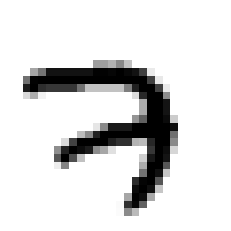

In [127]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [128]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [129]:
X_valid.shape

(5000, 28, 28)

In [130]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

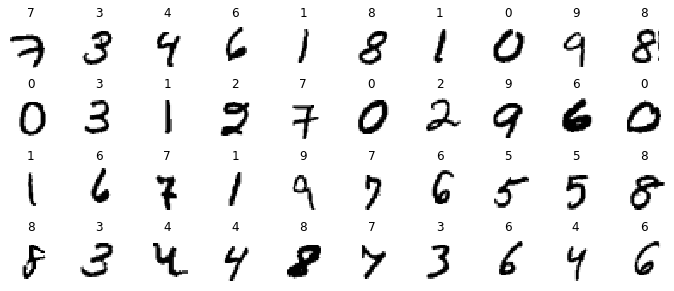

In [132]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [140]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [141]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [143]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [144]:
model.compile(loss="sparse_categorical_crossentropy",
            optimizer = keras.optimizers.SGD(learning_rate=1e-3),
            metrics=["accuracy"]
)
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [145]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.6147 - val_loss: nan - val_accuracy: 0.0958


We can now plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

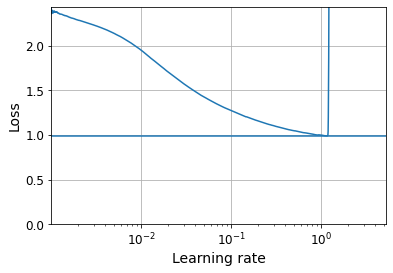

In [146]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [147]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [148]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [149]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

c:\Users\deepe\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [150]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [151]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2364 - accuracy: 0.9265 - val_loss: 0.0999 - val_accuracy: 0.9716
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0950 - accuracy: 0.9707 - val_loss: 0.0934 - val_accuracy: 0.9736
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0662 - accuracy: 0.9788 - val_loss: 0.0736 - val_accuracy: 0.9782
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0478 - accuracy: 0.9844 - val_loss: 0.0808 - val_accuracy: 0.9780
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0373 - accuracy: 0.9877 - val_loss: 0.0811 - val_accuracy: 0.9776
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0726 - val_accuracy: 0.9822
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0246 - accuracy: 0.9919 - val_loss: 0.0911 - val_a

In [152]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9783


[0.08125432580709457, 0.9782999753952026]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [153]:
%tensorboard --logdir=./my_mnist_logs --port=6006